In [170]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression , Perceptron
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , f1_score
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [171]:
DATASET_DIR = '../Dataset/body_level_classification_train.csv'
df = pd.read_csv(DATASET_DIR)

## Data Preprocessing

In [172]:
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [173]:

df['Gender'] = pd.factorize(df['Gender'])[0]
df['H_Cal_Consump'] = pd.factorize(df['H_Cal_Consump'])[0]
df['Alcohol_Consump'] = pd.factorize(df['Alcohol_Consump'])[0]
df['Smoking'] = pd.factorize(df['Smoking'])[0]
df['Food_Between_Meals'] = pd.factorize(df['Food_Between_Meals'])[0]
df['Fam_Hist'] = pd.factorize(df['Fam_Hist'])[0]
df['H_Cal_Burn'] = pd.factorize(df['H_Cal_Burn'])[0]
df['Transport'] = pd.factorize(df['Transport'])[0]
df['Body_Level'] = pd.factorize(df['Body_Level'])[0]
df['bmi'] = df['Weight'] / (df['Height'] * df['Height'])


In [174]:
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level,bmi
0,0,22.547298,1.722461,51.881263,0,2.663421,1.041110,0,0,3.000000,0,0,0,0.794402,1.391948,0,0,17.486856
1,1,19.799054,1.743702,54.927529,0,2.000000,2.847264,1,0,3.289260,1,0,0,1.680844,2.000000,0,0,18.065315
2,0,17.823438,1.708406,50.000000,0,1.642241,1.099231,1,0,3.452590,1,1,0,0.418875,1.000000,0,0,17.131202
3,0,19.007177,1.690727,49.895716,0,1.212908,1.029703,1,0,3.207071,1,1,0,2.000000,1.000000,0,0,17.454857
4,1,19.729250,1.793315,58.195150,0,2.508835,2.076933,0,0,3.435905,1,0,0,2.026668,1.443328,1,0,18.095627


## Feature Extraction

In [175]:
y = df['Body_Level']
X = df.drop(['Body_Level'], axis=1)
print(X.shape)
print(y.shape)

(1477, 17)
(1477,)


## Data Splitting

In [176]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1181, 17)
(1181,)
(296, 17)
(296,)


## Solving Class Imbalance for Training Data

In [177]:
# solve class imbalance problem
df = pd.concat([x_train, y_train], axis=1)

print("Before OverSampling, counts of label '0': {}".format(sum(df['Body_Level'] == 0)))
print("Before OverSampling, counts of label '1': {}".format(sum(df['Body_Level'] == 1)))
print("Before OverSampling, counts of label '2': {}".format(sum(df['Body_Level'] == 2)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(df['Body_Level'] == 3)))

df1 = df[df['Body_Level'] == 0]
df2 = df[df['Body_Level'] == 1]
df3 = df[df['Body_Level'] == 2]
df4 = df[df['Body_Level'] == 3]

print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

max_size = df['Body_Level'].value_counts().max()

# make every one of df1,df2,df3,df4 equal to max_size
df1 = df1.sample(max_size, replace=True)
df2 = df2.sample(max_size, replace=True)
df3 = df3.sample(max_size, replace=True)
df4 = df4.sample(max_size, replace=True)

# concat all dataframes
df = pd.concat([df1, df2, df3, df4])

print("After OverSampling, counts of label '0': {}".format(sum(df['Body_Level'] == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(df['Body_Level'] == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(df['Body_Level'] == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(df['Body_Level'] == 3)))


y_train = df['Body_Level']
x_train = df.drop(['Body_Level'], axis=1)

Before OverSampling, counts of label '0': 159
Before OverSampling, counts of label '1': 156
Before OverSampling, counts of label '2': 324
Before OverSampling, counts of label '3': 542 

(159, 18)
(156, 18)
(324, 18)
(542, 18)
After OverSampling, counts of label '0': 542
After OverSampling, counts of label '1': 542
After OverSampling, counts of label '2': 542
After OverSampling, counts of label '3': 542


## Models Training and Evaluation

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

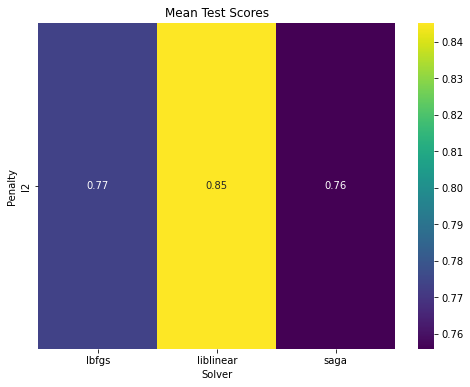

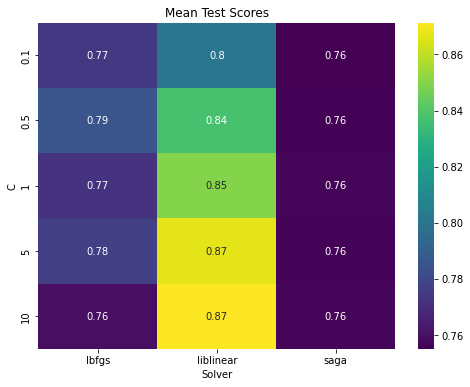

In [178]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# Create the Logistic Regression model
logreg = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the results
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# Prepare the hyperparameter values for plotting
param_values_C = param_grid['C']
param_values_penalty = param_grid['penalty']
param_values_solver = param_grid['solver']

# Reshape the mean test scores for plotting
mean_test_scores = np.array(mean_test_scores).reshape(len(param_values_C), len(param_values_penalty), len(param_values_solver))

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap of mean test scores
sns.heatmap(mean_test_scores.mean(axis=0), annot=True, cmap='viridis', xticklabels=param_values_solver, yticklabels=param_values_penalty)

# Set labels and title
plt.xlabel('Solver')
plt.ylabel('Penalty')
plt.title('Mean Test Scores')

# Show the plot
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap of mean test scores
sns.heatmap(mean_test_scores.mean(axis=1), annot=True, cmap='viridis', xticklabels=param_values_solver, yticklabels=param_values_C)

# Set labels and title
plt.xlabel('Solver')
plt.ylabel('C')
plt.title('Mean Test Scores')

# Show the plot
plt.show()


Accuracy Score of LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=0) is: 0.9763513513513513


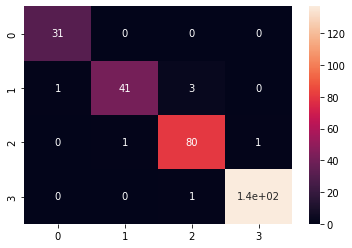

Classification Report of LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=0) is: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       0.98      0.91      0.94        45
           2       0.95      0.98      0.96        82
           3       0.99      0.99      0.99       138

    accuracy                           0.98       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.98      0.98      0.98       296

F1 Score of LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=0) is: 0.9762090344246556
Mean Training Score: 0.9963101712412596
Mean Cross-Validation Score: 0.9963101712412596
Gap between mean training score and mean cross-validation score: 0.0
------------------------------------------------------


In [182]:
#model = LogisticRegression(solver='liblinear', multi_class='auto', max_iter=10000, random_state=0, penalty='l2', C=10)
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=10000, random_state=0, penalty='l2')
# train the model
model.fit(x_train, y_train)

# predict the validation set
y_pred = model.predict(x_test)

# Accuracy Score
print("Accuracy Score of " + str(model) + " is: " + str(accuracy_score(y_test, y_pred)))

# Confusion Matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Classification Report
print("Classification Report of " + str(model) + " is: \n" + str(classification_report(y_test, y_pred)))

# Weighted F1 Score
print("F1 Score of " + str(model) + " is: " + str(f1_score(y_test, y_pred, average='weighted')))
# Perform cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean training score
mean_training_score = cv_scores.mean()
print("Mean Training Score: {}".format(mean_training_score))

# Calculate the mean cross-validation score
mean_cv_score = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean()
print("Mean Cross-Validation Score: {}".format(mean_cv_score))
# Calculate the gap between mean training score and mean cross-validation score
gap = mean_training_score - mean_cv_score

print("Gap between mean training score and mean cross-validation score:", gap)
print("------------------------------------------------------")